In [50]:
import math
import pandas as pd
import numpy as np
np.random.seed(42)
from collections import OrderedDict

%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['font.size'] = 16

matplotlib.rcParams['figure.figsize'] = (9,9)

import seaborn as sns

from IPython.core.pylabtools import figsize

from scipy.stats import percentileofscore
from scipy import stats

In [2]:
df = pd.read_csv('dataset/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [3]:
df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
count,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06,1.613554e+06
mean,8.185688e+11,1.157350e+01,1.689111e+02,6.807467e-02,4.469578e+00,8.985294e-01,-1.754218e-03,4.358774e-04,-2.671857e-04,4.824088e+03,9.009763e+00
std,4.951339e+11,8.665737e+01,1.072641e+02,1.426141e+00,8.129320e+00,3.249632e+00,1.430876e-01,3.460380e-01,1.525665e-01,1.617019e+06,8.106659e+00
min,0.000000e+00,7.500000e-01,0.000000e+00,-3.344084e+01,-5.730359e+01,-7.844842e+01,-2.644802e+01,-5.734489e+01,-5.355445e+01,0.000000e+00,-1.719776e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.087678e-01,-1.995674e+00,-9.265844e-01,-2.686586e-02,-2.983093e-02,-1.867207e-02,2.420000e+02,1.019846e+00
50%,8.074539e+11,4.259000e+00,1.682945e+02,6.130981e-02,9.082103e+00,7.807281e-01,-6.597335e-04,2.746582e-04,-3.051758e-05,5.200000e+02,7.540000e+00
75%,1.254130e+12,8.000000e+00,2.624448e+02,6.344828e-01,9.710000e+00,2.753416e+00,2.333505e-02,3.141879e-02,1.825624e-02,8.630000e+02,1.548176e+01
max,1.709397e+12,6.063000e+03,3.599985e+02,2.961647e+01,7.281000e+01,7.331421e+01,1.068810e+01,6.254202e+01,3.383183e+01,6.193165e+08,5.055000e+01


In [4]:
def count_nulls(df):
    null_counter = df.isnull().sum(axis=0)
    null_counter = null_counter[null_counter > 0]
    null_percent = df.isnull().sum(axis=0) / df.shape[0] * 100
    null_percent = null_percent[null_percent > 0]
    null_df = pd.concat([null_counter,null_percent],axis=1)
    null_df.columns = ['count','percent']
    display(null_df)

In [7]:
count_nulls(df)

,count,percent


In [10]:
# str_target_var="bookingId"
# ls_num_data = [col for col in df.columns if df[col].dtype != "object" and col != str_target_var]
# ncols = 3
# nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# # Visualization of numerical data
# for idx, var in enumerate(ls_num_data):
#     i = idx / ncols
#     j = idx % ncols
#     axes[i, j].get_xaxis().get_label().set_visible(False)
#     df.boxplot(column=var, by=str_target_var, ax=axes[i, j])
df.dtypes

bookingID           int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtype: object

In [ ]:
ax = df['Speed'].plot.kde(bw_method=0.3)

In [21]:
df[df["bookingID"]==1202590843006]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1.202591e+12,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
36004,1.202591e+12,3.033,77.0,1.137217,8.975278,3.981050,0.021118,-0.022515,0.024522,541.0,0.000000
37792,1.202591e+12,6.173,283.0,1.522818,7.947064,5.075056,0.137567,-0.297055,-0.017418,154.0,2.863286
57021,1.202591e+12,3.014,353.0,1.134775,8.932489,3.929421,-0.007959,-0.020543,-0.022986,1384.0,0.000000
76231,1.202591e+12,5.209,340.0,0.858197,9.078037,2.944571,0.061924,0.015219,0.025517,1142.0,9.750134
93956,1.202591e+12,3.014,326.0,1.030723,9.093197,3.593553,0.019164,0.004416,0.001449,812.0,0.000000
101646,1.202591e+12,3.000,315.0,0.938498,8.735906,4.567591,0.007278,-0.017104,-0.025045,1046.0,0.000000
122477,1.202591e+12,16.027,135.0,1.618471,7.706810,6.337251,-0.010140,-0.069377,0.014224,46.0,12.496430
130810,1.202591e+12,3.021,75.0,0.459601,8.632447,2.828108,0.014172,0.088750,0.031381,544.0,0.000000
188511,1.202591e+12,13.021,343.0,1.998440,9.150648,3.737292,-0.000262,-0.072780,-0.060266,579.0,0.725661


In [22]:
df1 = pd.read_csv('dataset/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df2 = pd.read_csv('dataset/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df3 = pd.read_csv('dataset/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df4 = pd.read_csv('dataset/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df5 = pd.read_csv('dataset/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df6 = pd.read_csv('dataset/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df7 = pd.read_csv('dataset/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df8 = pd.read_csv('dataset/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')
df9 = pd.read_csv('dataset/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv')

In [31]:
print(df1[df1["bookingID"]==1202590843006].shape)
print(df2[df2["bookingID"]==1202590843006].shape)
print(df3[df3["bookingID"]==1202590843006].shape)
print(df4[df4["bookingID"]==1202590843006].shape)
print(df5[df5["bookingID"]==1202590843006].shape)
print(df6[df6["bookingID"]==1202590843006].shape)
print(df7[df7["bookingID"]==1202590843006].shape)
print(df8[df8["bookingID"]==1202590843006].shape)
print(df9[df9["bookingID"]==1202590843006].shape)

(120, 11)
(103, 11)
(115, 11)
(110, 11)
(119, 11)
(96, 11)
(119, 11)
(123, 11)
(127, 11)


In [32]:
import glob

path = r'dataset/features' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [33]:
frame.shape

(16135561, 11)

In [57]:
df_book1 = frame[frame["bookingID"]==1202590843006]
df_book1.shape

(1151, 11)

In [58]:
print(df_book1["second"].max())
print(df_book1["second"].min())

1514.0
0.0


In [59]:
df_book1[df_book1["second"]==22]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
15257460,1202590843006,8.066,315.0,1.629647,8.689114,5.036654,0.091001,-0.007697,-0.007854,22.0,10.702716


In [67]:
df_book1=df_book1.sort_values('second')
df_book1_sec=df_book1.set_index('second')
df_book1_sec

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,Speed
second,,,,,,,,,,
0.0,1202590843006,3.024,316.0,1.438092,9.016305,3.961360,0.014591,0.007051,0.007191,0.000000
1.0,1202590843006,3.022,316.0,1.164760,8.577515,3.941843,0.007924,-0.011746,-0.015464,0.000000
2.0,1202590843006,3.019,316.0,1.168935,8.514557,3.600678,0.439840,-0.056287,-0.064804,0.000000
3.0,1202590843006,3.018,316.0,1.504823,8.948865,3.965516,-0.010978,0.010629,0.002356,0.000000
4.0,1202590843006,3.017,316.0,1.405559,9.003942,3.923254,0.015446,-0.005725,-0.002025,0.000000
5.0,1202590843006,3.016,316.0,1.510799,9.020375,4.036892,0.007400,0.010140,0.002496,0.000000
6.0,1202590843006,3.015,316.0,1.388417,8.934931,3.972460,-0.003281,0.000908,-0.012339,0.000000
7.0,1202590843006,3.015,316.0,1.432594,8.974598,4.086682,-0.004328,-0.003299,0.001222,0.000000
8.0,1202590843006,3.015,316.0,1.500647,9.021889,4.060633,0.004398,0.013003,0.009564,0.000000


<IPython.core.display.Javascript object>


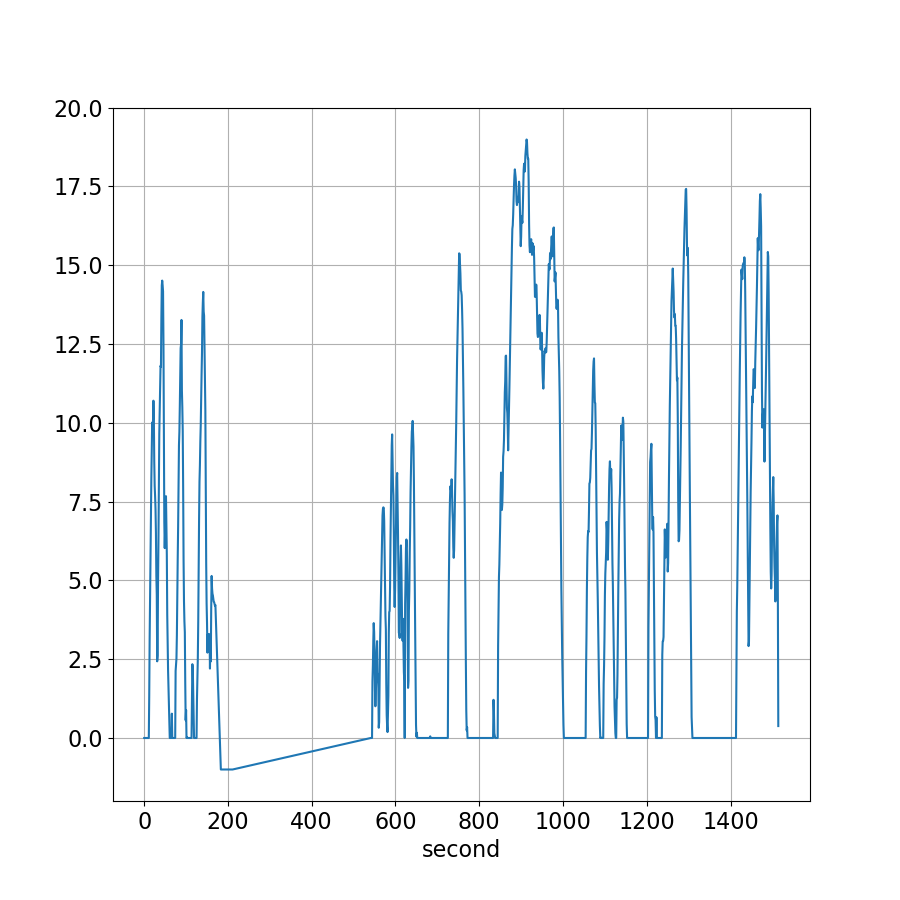

In [74]:
df_book1_sec['Speed'].plot(grid=True)

In [73]:
df_book1_sec['acceleration_x'].plot(grid=True)

In [75]:
df_book1[df_book1["Speed"]<0]

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
3860868,1202590843006,17.330,0.0,1.118686,9.006010,4.575827,0.000611,-0.030281,-0.027995,183.0,-1.0
9344222,1202590843006,33.414,0.0,1.212577,8.986129,4.122911,0.007226,0.009198,-0.005725,190.0,-1.0
12285570,1202590843006,18.656,0.0,1.042215,8.892363,4.014090,0.002862,-0.010105,0.004765,192.0,-1.0
5870654,1202590843006,20.963,0.0,1.160728,8.941960,4.052761,0.007034,0.005864,-0.003875,200.0,-1.0
3373543,1202590843006,16.023,0.0,1.090339,9.162466,3.673424,-0.061366,-0.024801,-0.017209,201.0,-1.0
3938698,1202590843006,24.692,0.0,1.057825,8.924645,4.019759,-0.008884,-0.013038,-0.012392,211.0,-1.0
